In [3]:
import pandas as pd

# Reload the latest offline file to ensure we have the correct data
offline_data = pd.read_excel('/Users/farahfatima/Downloads/Marketing_AM_Assignment 2/MarketingAnalyticsAsstManager_Assignment_Data.xlsx', sheet_name='showroom_sales')

# Displaying the first few rows to verify the data structure after reloading
offline_data.head()




,Unnamed: 0,event_date,event_timestamp,event_name,user_id,items
0,0,21/2/2022,00:24:06.400000,purchase,134972,"[{'item_id': '40370031', 'price': 284.05, 'qua..."
1,1,21/2/2022,00:36:49.900000,purchase,135710,"[{'item_id': '52460075', 'price': 849.0, 'quan..."
2,2,21/2/2022,00:00:26.500000,purchase,37105,"[{'item_id': '50440732-LE4016', 'price': 574.0..."
3,3,21/2/2022,00:20:32.900000,purchase,134883,"[{'item_id': 'T50440992-LW4001-GD', 'price': 6..."
4,4,21/2/2022,00:58:26,purchase,110906,"[{'item_id': '40550133', 'price': 378.56, 'qua..."


In [4]:
import json

# Define a function to split the items list into separate columns for each item_id, price, and quantity
def split_items(data):
    # Initialize dictionaries to hold the new columns
    item_ids = {}
    prices = {}
    quantities = {}
    
    # Loop over each row in the data
    for index, row in data.iterrows():
        # Parse the items column (assuming it's stored as a JSON-like string if it's loaded as a string)
        items = row['items']
        if isinstance(items, str):  # If items are strings (e.g., from JSON structure), parse them
            items = json.loads(items.replace("'", "\""))

        # Loop over each item and add it to the dictionaries
        for i, item in enumerate(items, start=1):
            item_ids[f'Item{i}_id'] = item.get('item_id', None)
            prices[f'Item{i}_price'] = item.get('price', None)
            quantities[f'Item{i}_quantity'] = item.get('quantity', None)
        
        # Update the row with new columns
        for key, value in item_ids.items():
            data.loc[index, key] = value
        for key, value in prices.items():
            data.loc[index, key] = value
        for key, value in quantities.items():
            data.loc[index, key] = value

    return data

# Applying the function to transform offline data
offline_transformed = split_items(offline_data.copy())

# Display the transformed offline data to confirm the results
offline_transformed.head()


,Unnamed: 0,event_date,event_timestamp,event_name,user_id,items,Item1_id,Item1_price,Item1_quantity,Item2_id,...,Item7_id,Item8_id,Item5_price,Item6_price,Item7_price,Item8_price,Item5_quantity,Item6_quantity,Item7_quantity,Item8_quantity
0,0,21/2/2022,00:24:06.400000,purchase,134972,"[{'item_id': '40370031', 'price': 284.05, 'qua...",40370031,284.05,1.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,21/2/2022,00:36:49.900000,purchase,135710,"[{'item_id': '52460075', 'price': 849.0, 'quan...",52460075,849.00,1.0,T50441013,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,21/2/2022,00:00:26.500000,purchase,37105,"[{'item_id': '50440732-LE4016', 'price': 574.0...",50440732-LE4016,574.01,1.0,50440731-LE4016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,21/2/2022,00:20:32.900000,purchase,134883,"[{'item_id': 'T50440992-LW4001-GD', 'price': 6...",T50440992-LW4001-GD,657.10,1.0,50440731-LE4016,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,21/2/2022,00:58:26,purchase,110906,"[{'item_id': '40550133', 'price': 378.56, 'qua...",40550133,378.56,1.0,40550093,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
# Loading the latest version of the offline data file provided by the user for accurate calculations
# Using the 'showroom_sales' sheet to load offline purchase data
offline_data = pd.read_excel('/Users/farahfatima/Downloads/Marketing_AM_Assignment 2/MarketingAnalyticsAsstManager_Assignment_Data.xlsx', sheet_name='showroom_sales')

# Display the first few rows to verify the structure of the offline data
offline_data.head()

import json

# Filter the data for "purchase" events
offline_purchase_only = offline_data[offline_data['event_name'] == 'purchase'].copy()

# Initialize lists to store the item details separately
item_ids = []
prices = []
quantities = []

# Expand the 'items' column to get item details
for i, row in offline_purchase_only.iterrows():
    items = json.loads(row['items'].replace("'", "\""))  # Convert items to JSON format if it's a string
    for item in items:
        # Extract item details for each item in the list
        item_ids.append(item.get('item_id'))
        prices.append(item.get('price'))
        quantities.append(item.get('quantity', 1))  # Assume quantity is 1 if not specified

# Calculate metrics based on extracted item details

# 1. Total Sales Value
total_sales_value_offline = sum([p * q for p, q in zip(prices, quantities)])

# 2. Total Items Sold
total_items_sold_offline = sum(quantities)

# 3. Average Transaction Value (total sales value / number of purchases)
average_transaction_value_offline = total_sales_value_offline / len(offline_purchase_only)

# 4. Average Items per Purchase (total items sold / number of purchases)
average_items_per_purchase_offline = total_items_sold_offline / len(offline_purchase_only)

average_transaction_value_offline, total_sales_value_offline, total_items_sold_offline, average_items_per_purchase_offline


(1626.4630222222222, 365954.18, 462.0, 2.0533333333333332)

In [8]:
# Performing a price sensitivity analysis on the offline data
# Analyzing the average price and determining the optimal price points based on specified price buckets

# Calculate Average Price per item in the offline data (considering only rows with purchase events)
average_price_offline = sum(prices) / len(prices)

# Identifying the count of items above the specified threshold (e.g., $1250)
price_threshold = 1250
items_above_threshold = [price for price in prices if price > price_threshold]
total_revenue_above_threshold = sum([p * q for p, q in zip(prices, quantities) if p > price_threshold])

# Compile the results
average_price_offline, total_revenue_above_threshold, len(items_above_threshold)


(798.9176263736264, 121325.79000000001, 70)

In [18]:
# Displaying the column names in store_traffic_data to verify the correct name for the foot traffic column
store_traffic_data.columns

# Reloading the store_traffic_data to verify its structure
store_traffic_data = pd.read_excel('/Users/farahfatima/Downloads/Marketing_AM_Assignment 2/MarketingAnalyticsAsstManager_Assignment_Data.xlsx', sheet_name='store_traffic')

# Display the first few rows to understand the structure and column names
store_traffic_data.head()

# Renaming columns for consistency with the analysis
store_traffic_data = store_traffic_data.rename(columns={'date': 'event_date', 'Offline Traffic': 'foot_traffic'})
store_traffic_data['event_date'] = pd.to_datetime(store_traffic_data['event_date'])

# Re-run the foot traffic analysis now that store_traffic_data is correctly structured

# Find the date with the highest foot traffic
most_active_date = store_traffic_data.loc[store_traffic_data['foot_traffic'].idxmax(), 'event_date']
highest_foot_traffic = store_traffic_data['foot_traffic'].max()

# Displaying all results
highest_daily_quantity, highest_daily_quantity_date, average_weekly_orders, average_weekly_items, highest_daily_revenue, highest_daily_revenue_date, most_active_date, highest_foot_traffic


(127.0,
 Timestamp('2022-02-27 00:00:00'),
 218.0,
 462.0,
 107901.2,
 Timestamp('2022-02-27 00:00:00'),
 Timestamp('2022-02-20 00:00:00'),
 144)

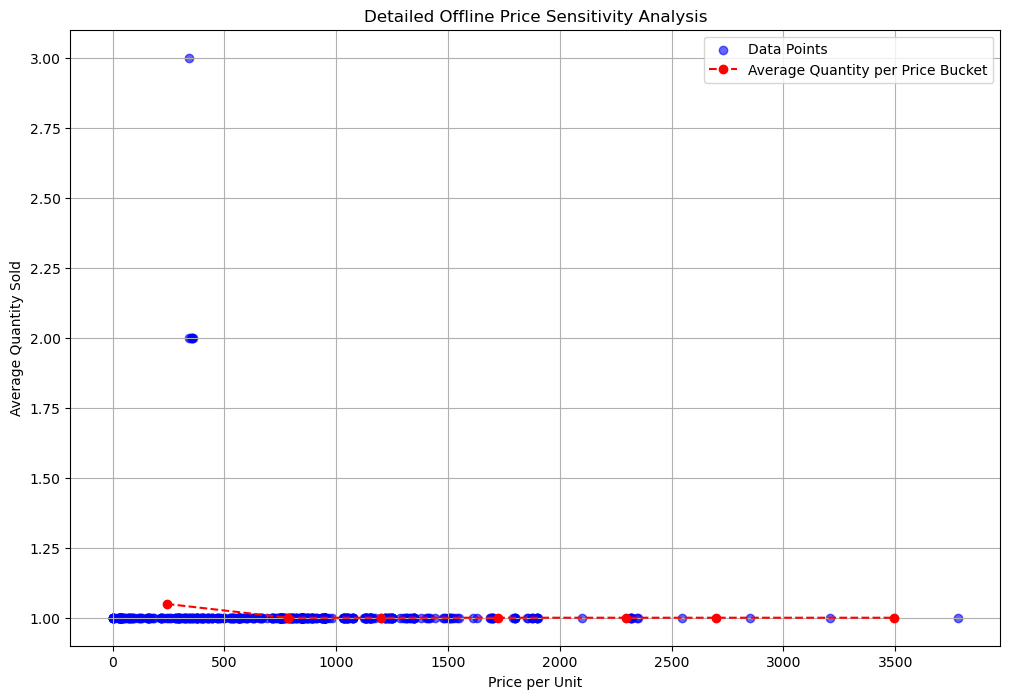

In [22]:
# Importing matplotlib.pyplot as plt for plotting
import matplotlib.pyplot as plt

# Re-plotting the scatter plot with trendline after importing plt
plt.figure(figsize=(12, 8))
plt.scatter(expanded_offline_data['price'], expanded_offline_data['quantity'], alpha=0.6, color='b', label='Data Points')

# Adding trendline for average quantity sold per price bucket
trendline_x = price_bucket_analysis['avg_price']
trendline_y = price_bucket_analysis['avg_quantity_sold']
plt.plot(trendline_x, trendline_y, color='r', linestyle='--', marker='o', label='Average Quantity per Price Bucket')

# Adding plot labels and title
plt.title('Detailed Offline Price Sensitivity Analysis')
plt.xlabel('Price per Unit')
plt.ylabel('Average Quantity Sold')
plt.legend()
plt.grid(True)
plt.show()


In [25]:
# Define price buckets for offline analysis
price_bins = [0, 500, 1000, 1500, 2000, 2500, 3000, 5000, 10000]
expanded_offline_data['price_bucket'] = pd.cut(expanded_offline_data['price'], bins=price_bins)

# Calculate average quantity sold, total revenue, and average price per price bucket
price_bucket_analysis = expanded_offline_data.groupby('price_bucket').agg(
    avg_quantity_sold=('quantity', 'mean'),
    total_revenue=('total_price', 'sum'),
    avg_price=('price', 'mean')
).reset_index()

# Filter the results to include only relevant buckets (0-2500)
price_bucket_analysis_filtered = price_bucket_analysis[price_bucket_analysis['price_bucket'].isin([
    pd.Interval(0, 500, closed='right'),
    pd.Interval(500, 1000, closed='right'),
    pd.Interval(1000, 1500, closed='right'),
    pd.Interval(1500, 2000, closed='right'),
    pd.Interval(2000, 2500, closed='right')
])]

# Displaying the filtered results for exact insights
price_bucket_analysis_filtered


,price_bucket,avg_quantity_sold,total_revenue,avg_price
0,"(0, 500]",1.049296,36799.09,241.918521
1,"(500, 1000]",1.000000,131724.25,784.072917
2,"(1000, 1500]",1.000000,111552.91,1199.493656
3,"(1500, 2000]",1.000000,55108.93,1722.154063
4,"(2000, 2500]",1.000000,18384.73,2298.091250
